In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv


In [25]:
df = pd.read_csv('/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv')

In [26]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [27]:
df.shape

(962, 2)

In [28]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [15]:
df['Category'].value_counts().index

Index(['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer',
       'Web Designing', 'HR', 'Hadoop', 'Blockchain', 'ETL Developer',
       'Operations Manager', 'Data Science', 'Sales', 'Mechanical Engineer',
       'Arts', 'Database', 'Electrical Engineering', 'Health and fitness',
       'PMO', 'Business Analyst', 'DotNet Developer', 'Automation Testing',
       'Network Security Engineer', 'SAP Developer', 'Civil Engineer',
       'Advocate'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7c9dd12f53c0>,
 [Text(1.058871228953308, 0.29797939609125923, 'Java Developer'),
  Text(0.7841417468169057, 0.7714413269322118, 'Testing'),
  Text(0.4134731563409379, 1.0193330903024107, 'DevOps Engineer'),
  Text(0.053862331076050214, 1.098680503736666, 'Python Developer'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'HR'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Hadoop'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Blockchain'),
  Text(-1.0745482070561094, 0.23525762625789806, 'ETL Developer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Operations Manager'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Data Science'),
  Text(-0.9271404102234844, -0.5919549473825093, 'Sales'),
  Text(-0.7427813690411197, -0.811341998053472, 'Mechanical Engineer'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Arts'),
  Text(-0.291057286964679, -1.0607948226234707, 'Data

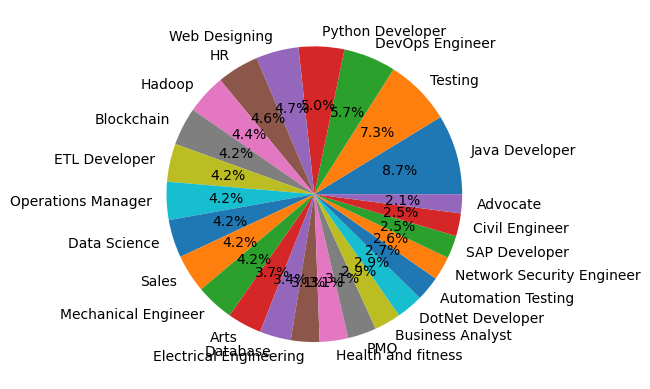

In [29]:
plt.figure().set_figwidth(50)
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%')

In [30]:
df.iloc[0]['Resume']

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [42]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [45]:
remove_punc("Hello, How? are! >> you")

'Hello How are  you'

In [33]:
df['Resume'] = df['Resume'].str.lower()


In [47]:
df['Resume'] = df['Resume'].apply(lambda x: remove_punc(x))

In [50]:
df['Resume'][1]

'education details \r\nmay 2013 to may 2017 be   uitrgpv\r\ndata scientist \r\n\r\ndata scientist  matelabs\r\nskill details \r\npython exprience  less than 1 year months\r\nstatsmodels exprience  12 months\r\naws exprience  less than 1 year months\r\nmachine learning exprience  less than 1 year months\r\nsklearn exprience  less than 1 year months\r\nscipy exprience  less than 1 year months\r\nkeras exprience  less than 1 year monthscompany details \r\ncompany  matelabs\r\ndescription  ml platform for business professionals dummies and enthusiasts\r\n60a koramangala 5th block\r\nachievementstasks behind sukh sagar bengaluru\r\nindia                               developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment outlier detection encoding scaling feature selection and dimensionality reduction\r\ndeployed automated classification and regression model\r\nlinkedincominadityarathore\r\nb4600b146                           reasearch and depl

In [51]:
from nltk.corpus import stopwords
stop_words =  set(stopwords.words('english'))
stop_words.add('http')

In [53]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [55]:
df['Resume'] = df['Resume'].apply(lambda x: remove_stopwords(x))

In [56]:
df['Resume'][1]

'education details may 2013 may 2017 uitrgpv data scientist data scientist matelabs skill details python exprience less 1 year months statsmodels exprience 12 months aws exprience less 1 year months machine learning exprience less 1 year months sklearn exprience less 1 year months scipy exprience less 1 year months keras exprience less 1 year monthscompany details company matelabs description ml platform business professionals dummies enthusiasts 60a koramangala 5th block achievementstasks behind sukh sagar bengaluru india developed deployed auto preprocessing steps machine learning mainly missing value treatment outlier detection encoding scaling feature selection dimensionality reduction deployed automated classification regression model linkedincominadityarathore b4600b146 reasearch deployed time series forecasting model arima sarimax holtwinter prophet worked metafeature extracting problem githubcomrathorology implemented state art research paper outlier detection mixed attributes 